<a href="https://colab.research.google.com/github/PrathamBhat-prog/Stock-Market-Prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D, BatchNormalization, SimpleRNN


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("NFLX.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
dataset = np.array(df.Close)

In [8]:
sc = StandardScaler()
dataset = sc.fit_transform(dataset.reshape(-1, 1))

In [9]:
def create_sequence(time_step, dataset):
    X, y = [], []
    for i in range(len(dataset)-time_step):
        X.append(dataset[i:i+time_step])
        y.append(dataset[i+time_step])

    return np.array(X), np.array(y)

In [10]:
X, y = create_sequence(60, dataset)

In [11]:
X.shape, y.shape

((949, 60, 1), (949, 1))

In [12]:
X = X.reshape(X.shape[0], X.shape[1])
y = y.reshape(y.shape[0])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 0.25, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle = False, test_size = 0.2, random_state = 42)

In [14]:
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(60, 1), padding='same'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = "same"))
model.add(Conv1D(filters=32, kernel_size = 3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = "same"))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = "same"))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear', kernel_regularizer = tf.keras.regularizers.l2(0.001)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from tensorflow.keras.callbacks import EarlyStopping
checkpoint1 = EarlyStopping(
    monitor='val_mse',
    min_delta = 0.0001,
    patience = 5,
    mode = "min",
    restore_best_weights = True
)

In [16]:
model.compile(optimizer = "rmsprop", loss = "mean_squared_error", metrics = ["mse"])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 60, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 30, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 30, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 15, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,665 (303.38 KB)

 Trainable params: 77,665 (303.38 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 100, validation_data = (X_val, y_val), shuffle = False, callbacks = checkpoint1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.4308 - mse: 0.1911 - val_loss: 0.4810 - val_mse: 0.2887
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3112 - mse: 0.1301 - val_loss: 0.2342 - val_mse: 0.0853
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2244 - mse: 0.0842 - val_loss: 0.1681 - val_mse: 0.0526
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1766 - mse: 0.0674 - val_loss: 0.1394 - val_mse: 0.0482
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1422 - mse: 0.0555 - val_loss: 0.1210 - val_mse: 0.0477
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1269 - mse: 0.0569 - val_loss: 0.1096 - val_mse: 0.0493
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1034 - mse: 0.0455 - val_loss: 0.0981 - val_mse: 0.0477
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0907 - mse: 0.0420 - val_loss: 0.0921 - val_mse: 0.0487
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.07

In [19]:
y_preds = model.predict(X_test)
y_test = sc.inverse_transform(y_test.reshape(-1,1))
y_preds = sc.inverse_transform(y_preds.reshape(-1,1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [20]:
y_preds_train = sc.inverse_transform(model.predict(X_train).reshape(-1, 1))
y_preds_val = sc.inverse_transform(model.predict(X_val).reshape(-1, 1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


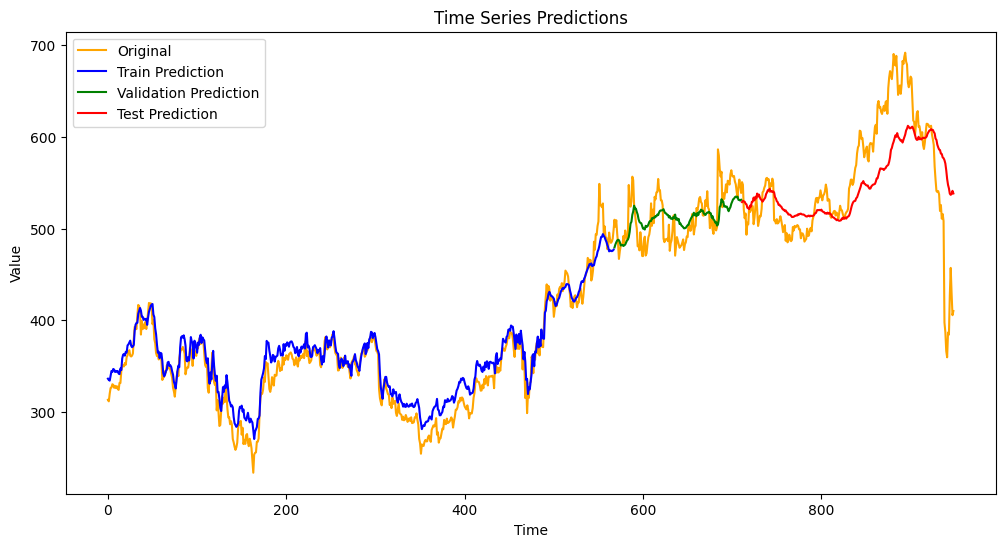

In [21]:
train_idx = range(len(y_preds_train))
val_idx = range(len(y_preds_train), len(y_preds_train) + len(y_preds_val))
test_idx = range(len(y_preds_train) + len(y_preds_val), len(y_preds_train) + len(y_preds_val) + len(y_preds))

plt.figure(figsize=(12,6))
plt.plot(sc.inverse_transform(y.reshape(-1, 1)), label="Original", color="orange")
plt.plot(train_idx, y_preds_train, label="Train Prediction", color="blue")
plt.plot(val_idx, y_preds_val, label="Validation Prediction", color="green")
plt.plot(test_idx, y_preds, label="Test Prediction", color="red")

plt.legend()
plt.title("Time Series Predictions")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [22]:
RMSE = math.sqrt(mean_squared_error(y_test, y_preds))
print(f"Test RMSE: {RMSE:.2f}")

r2 = r2_score(y_test, y_preds)
print(f"Test R2 Score: {r2*100:.2f}%")

Test RMSE: 49.93
Test R2 Score: 42.80%


In [23]:
from tensorflow.keras import layers

class CustomRecurrentCell(layers.Layer):
    """
    A custom recurrent cell inspired by the provided diagram.
    It takes the previous cell state (C_t-1) and current input (X_t)
    and computes the new cell state (C_t).
    """
    def __init__(self, units, **kwargs):
        super(CustomRecurrentCell, self).__init__(**kwargs)
        self.units = units
        self.state_size = units
        self.output_size = units

        self.forget_gate_nn = layers.Dense(units, activation='sigmoid', name='forget_gate', kernel_regularizer = tf.keras.regularizers.l2(0.001))
        self.input_gate_nn = layers.Dense(units, activation='tanh', name='input_gate', kernel_regularizer = tf.keras.regularizers.l2(0.001))
        self.candidate_state_nn = layers.Dense(units, activation='sigmoid', name='candidate_cell_state',kernel_regularizer = tf.keras.regularizers.l2(0.001))

    def call(self, inputs, states):
        prev_cell_state = states[0]

        forget_output = self.forget_gate_nn(inputs)
        input_gate_output = self.input_gate_nn(inputs)

        current_cell_state = tf.multiply(prev_cell_state, forget_output)

        candidate_cell_state = self.candidate_state_nn(current_cell_state)

        term2 = tf.multiply(input_gate_output, candidate_cell_state)

        current_cell_state = tf.add(tf.math.tanh(current_cell_state), tf.nn.leaky_relu(term2, alpha = 0.5))

        return current_cell_state, [current_cell_state]

    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if dtype is None:
            dtype = tf.float32
        return [tf.zeros((batch_size, self.units), dtype=dtype)]

    def get_config(self):
        config = super(CustomRecurrentCell, self).get_config()
        config.update({"units": self.units})
        return config

In [24]:
input_dim = 1
output_dim = 1
timesteps = 60
rnn_units = 128

model = tf.keras.Sequential([
        layers.Input(shape=(timesteps, input_dim)),
        layers.RNN(CustomRecurrentCell(rnn_units), return_sequences=False, name='custom_rnn'),
        layers.Dense(1, activation = "linear")
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'custom_recurrent_cell', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [25]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.005), loss = "mse", metrics = ["mse"])

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_rnn (RNN)                │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
checkpoint2 = EarlyStopping(
    monitor='val_mse',
    min_delta = 0.0001,
    patience = 5,
    mode = "min",
    restore_best_weights = True
)

In [28]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    shuffle = False,
    callbacks = [checkpoint2]
)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.2079 - mse: 0.1312 - val_loss: 0.0958 - val_mse: 0.0868
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0223 - mse: 0.0153 - val_loss: 0.0327 - val_mse: 0.0286
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0174 - mse: 0.0137 - val_loss: 0.0617 - val_mse: 0.0588
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0140 - mse: 0.0111 - val_loss: 0.0255 - val_mse: 0.0228
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0131 - mse: 0.0105 - val_loss: 0.0294 - val_mse: 0.0272
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0130 - mse: 0.0107 - val_loss: 0.0229 - val_mse: 0.0206
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0123 - mse: 0.0101 - val_loss: 0.0243 - val_mse: 0.0223
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mse: 0.0110 - val_loss: 0.0218 - val_mse: 0.0198
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.012

In [29]:
y_preds_rnn = model.predict(X_test)
y_preds_rnn = sc.inverse_transform(y_preds_rnn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [30]:
y_preds_train_rnn = sc.inverse_transform(model.predict(X_train))
y_preds_val_rnn = sc.inverse_transform(model.predict(X_val))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


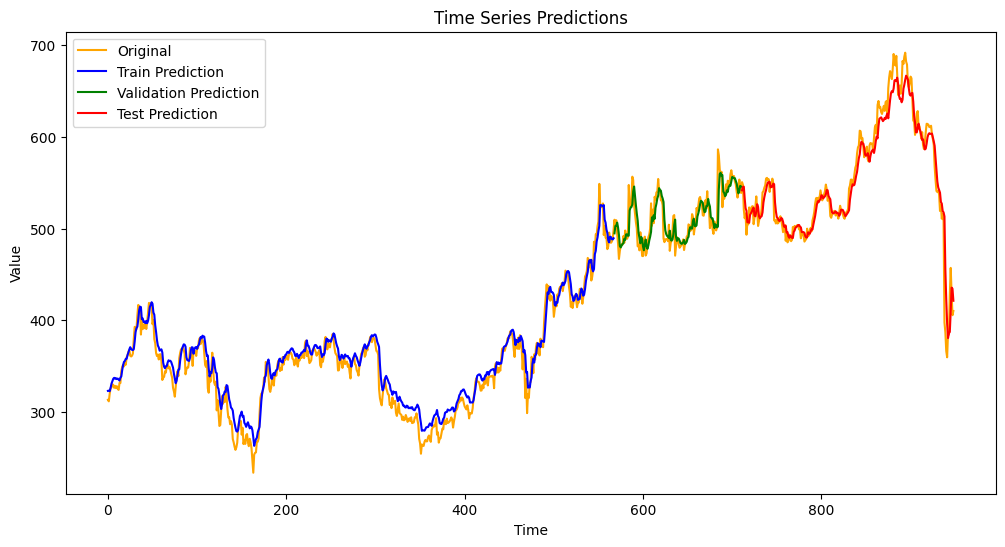

In [31]:
train_idx = range(len(y_preds_train_rnn))
val_idx = range(len(y_preds_train_rnn), len(y_preds_train_rnn) + len(y_preds_val_rnn))
test_idx = range(len(y_preds_train_rnn) + len(y_preds_val_rnn), len(y_preds_train_rnn) + len(y_preds_val_rnn) + len(y_preds_rnn))

plt.figure(figsize=(12,6))
plt.plot(sc.inverse_transform(y.reshape(-1, 1)), label="Original", color="orange")
plt.plot(train_idx, y_preds_train_rnn, label="Train Prediction", color="blue")
plt.plot(val_idx, y_preds_val_rnn, label="Validation Prediction", color="green")
plt.plot(test_idx, y_preds_rnn, label="Test Prediction", color="red")

plt.legend()
plt.title("Time Series Predictions")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [32]:
rnn_r2 = r2_score(y_test, y_preds_rnn)
rnn_RMSE = math.sqrt(mean_squared_error(y_test, y_preds_rnn))

print(f"Test RMSE: {rnn_RMSE:.2f}")
print(f"RNN R2 Score: {rnn_r2*100:.2f}%")

Test RMSE: 16.65
RNN R2 Score: 93.64%
